<a href="https://colab.research.google.com/github/YopaNelly/AI-ML-Basics/blob/main/Part_1_Text_Classification_with_RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer


In [ ]:
# Import the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [ ]:
# import the json file

df = pd.read_json('news_dategory_dataset_v3.json', lines=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [ ]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('link').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('headline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('short_description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('link')):
  _plot_series(series, series_name, i)
  fig.legend(title='link', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('headline')):
  _plot_series(series, series_name, i)
  fig.legend(title='headline', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('category')):
  _plot_series(series, series_name, i)
  fig.legend(title='category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('short_description')):
  _plot_series(series, series_name, i)
  fig.legend(title='short_description', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['headline'].value_counts()
    for x_label, grp in _df_13.groupby('link')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('link')
_ = plt.ylabel('headline')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['category'].value_counts()
    for x_label, grp in _df_14.groupby('headline')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('headline')
_ = plt.ylabel('category')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['short_description'].value_counts()
    for x_label, grp in _df_15.groupby('category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('category')
_ = plt.ylabel('short_description')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['authors'].value_counts()
    for x_label, grp in _df_16.groupby('short_description')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('short_description')
_ = plt.ylabel('authors')

In [ ]:
df.shape

(209527, 6)

In [141]:
# drop the columns link, authors and	date since it's not necessery for the predictions

df = df.drop(['link', 'authors', 'date'], axis=1)
df.head()


,headline,category,short_description
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha..."
3,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to..."
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...


from matplotlib import pyplot as plt
import seaborn as sns
_df_17.groupby('headline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_18.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('short_description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['category'].value_counts()
    for x_label, grp in _df_20.groupby('headline')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('headline')
_ = plt.ylabel('category')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['short_description'].value_counts()
    for x_label, grp in _df_21.groupby('category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('category')
_ = plt.ylabel('short_description')

In [ ]:
df.dtypes

,0
headline,object
category,object
short_description,object


In [ ]:
# prompt: convert category to categories datatypes

df['category'] = df['category'].astype('category')
df.dtypes


,0
headline,object
category,category
short_description,object


In [ ]:
df["category"].unique()

['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS', ..., 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS', 'DIVORCE']
Length: 42
Categories (42, object): ['ARTS', 'ARTS & CULTURE', 'BLACK VOICES', 'BUSINESS', ..., 'WELLNESS',
                          'WOMEN', 'WORLD NEWS', 'WORLDPOST']

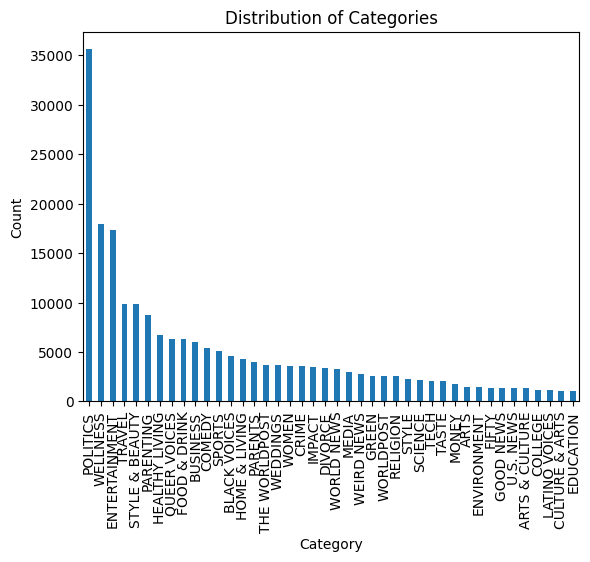

In [ ]:
# histogram to show the distribution of each category in the caterory column

import matplotlib.pyplot as plt
df['category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()


In [ ]:
# # count of each category in the category column in decending order

df['category'].value_counts()


,count
category,
POLITICS,35602
WELLNESS,17945
ENTERTAINMENT,17362
TRAVEL,9900
STYLE & BEAUTY,9814
PARENTING,8791
HEALTHY LIVING,6694
QUEER VOICES,6347
FOOD & DRINK,6340


In [ ]:
# c

# Filter out rows based on category counts
df_filtered = df[~df['category'].isin(['THE WORLDPOST', 'WEDDINGS', 'WOMEN', 'CRIME', 'IMPACT', 'DIVORCE', 'WORLD NEWS', 'MEDIA', 'WEIRD NEWS', 'GREEN', 'WORLDPOST', 'RELIGION', 'STYLE', 'SCIENCE', 'TECH', 'TASTE', 'MONEY', 'ARTS', 'ENVIRONMENT', 'FIFTY', 'GOOD NEWS', 'U.S. NEWS', 'ARTS & CULTURE', 'COLLEGE', 'LATINO VOICES', 'CULTURE & ARTS', 'EDUCATION'])]

# Verify the changes
print(df_filtered['category'].value_counts())


category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
TASTE                 0
STYLE                 0
WORLD NEWS            0
WEDDINGS              0
WEIRD NEWS            0
TECH                  0
THE WORLDPOST         0
SCIENCE               0
WOMEN                 0
U.S. NEWS             0
ARTS                  0
MONEY                 0
RELIGION              0
ARTS & CULTURE        0
MEDIA                 0
LATINO VOICES         0
IMPACT                0
GREEN                 0
GOOD NEWS             0
FIFTY                 0
ENVIRONMENT           0
EDUCATION             0
DIVORCE               0
CULTURE & ARTS        0
CRIME                 0
COLLEGE               0
WORLDPO

In [ ]:
df_filtered["category"].unique()

['COMEDY', 'PARENTING', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', ..., 'HOME & LIVING', 'BLACK VOICES', 'TRAVEL', 'PARENTS', 'HEALTHY LIVING']
Length: 15
Categories (42, object): ['ARTS', 'ARTS & CULTURE', 'BLACK VOICES', 'BUSINESS', ..., 'WELLNESS',
                          'WOMEN', 'WORLD NEWS', 'WORLDPOST']

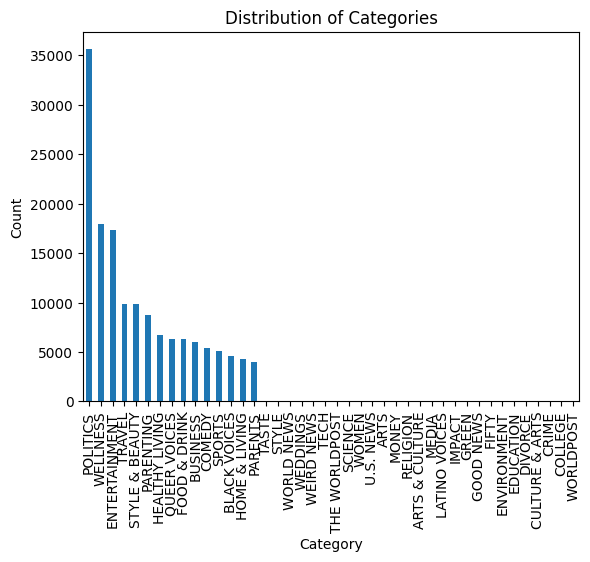

In [ ]:
# histogram to show the distribution of each category in the caterory column

import matplotlib.pyplot as plt
df_filtered['category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()


In [ ]:
df_filtered.shape

(148122, 3)

In [ ]:
df.shape

(209527, 3)

In [ ]:
df.dtypes

,0
headline,object
category,category
short_description,object


In [ ]:
df.isnull().sum()

,0
headline,0
category,0
short_description,0


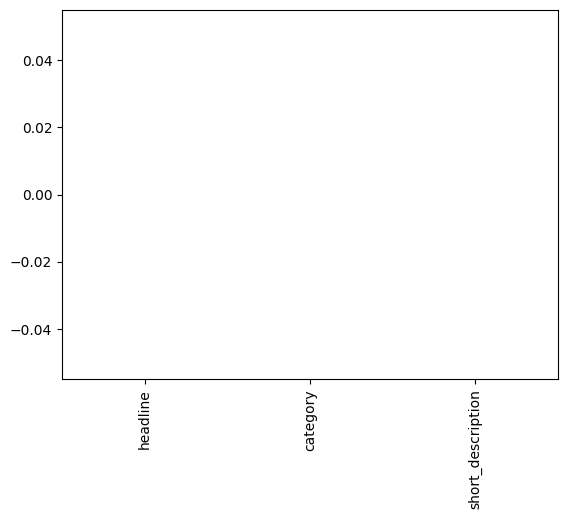

In [ ]:
# histogram to represent null values

import matplotlib.pyplot as plt
df.isna().sum().plot(kind="bar")
plt.show()


In [ ]:
df.shape

(209527, 3)

In [ ]:
# convert  the columns  'category', 'headline', 'short_description' all to lowercase character

df_filtered['category'] = df['category'].str.lower()
df_filtered['headline'] = df['headline'].str.lower()
df_filtered['short_description'] = df['short_description'].str.lower()


<ipython-input-112-92d2ecd9b735>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['category'] = df['category'].str.lower()
<ipython-input-112-92d2ecd9b735>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['headline'] = df['headline'].str.lower()
<ipython-input-112-92d2ecd9b735>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [ ]:
df_filtered.head()

,headline,category,short_description
2,23 of the funniest tweets about cats and dogs ...,comedy,"""until you have a dog you don't understand wha..."
3,the funniest tweets from parents this week (se...,parenting,"""accidentally put grown-up toothpaste on my to..."
17,"maury wills, base-stealing shortstop for dodge...",sports,"maury wills, who helped the los angeles dodger..."
20,golden globes returning to nbc in january afte...,entertainment,"for the past 18 months, hollywood has effectiv..."
21,biden says u.s. forces would defend taiwan if ...,politics,president issues vow as tensions with china rise.


In [ ]:
# rem0ve all punctuations to these columns

import string
df_filtered['category'] = df['category'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))
df_filtered['headline'] = df['headline'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))
df_filtered['short_description'] = df['short_description'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))


<ipython-input-109-247aaf2a03db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['category'] = df['category'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))
<ipython-input-109-247aaf2a03db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['headline'] = df['headline'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))
<ipython-input-109-247aaf2a03db>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [ ]:
df_filtered.head()

,headline,category,short_description
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,Until you have a dog you dont understand what ...
3,The Funniest Tweets From Parents This Week Sep...,PARENTING,Accidentally put grownup toothpaste on my todd...
17,Maury Wills BaseStealing Shortstop For Dodgers...,SPORTS,Maury Wills who helped the Los Angeles Dodgers...
20,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT,For the past 18 months Hollywood has effective...
21,Biden Says US Forces Would Defend Taiwan If Ch...,POLITICS,President issues vow as tensions with China rise


In [ ]:
df.dtypes

,0
headline,object
category,category
short_description,object


In [ ]:
# convert all the object datatypes to string

df['category'] = df['category'].astype(str)
df['headline'] = df['headline'].astype(str)
df['short_description'] = df['short_description'].astype(str)
df.dtypes


,0
headline,object
category,object
short_description,object


**Preprocess the text**

In [ ]:
# Preprocess the text
X = df_filtered[['headline', 'short_description']].values
y = df_filtered['category'].values

**Encode the labels**

In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

**Split the data**

In [ ]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.astype(str).tolist()
X_val = X_val.astype(str).tolist()


In [ ]:
# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [ ]:
# Pad the sequences
X_train = pad_sequences(X_train, padding='post', maxlen=100)
X_val = pad_sequences(X_val, padding='post', maxlen=100)


In [ ]:
# Build the model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
model.add(LSTM(128))
model.add(Dense(15, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5
3704/3704 ━━━━━━━━━━━━━━━━━━━━ 670s 180ms/step - accuracy: 0.2414 - loss: 2.4688 - val_accuracy: 0.2386 - val_loss: 2.4648
Epoch 2/5
3704/3704 ━━━━━━━━━━━━━━━━━━━━ 680s 179ms/step - accuracy: 0.2409 - loss: 2.4627 - val_accuracy: 0.2386 - val_loss: 2.4617
Epoch 3/5
3704/3704 ━━━━━━━━━━━━━━━━━━━━ 679s 178ms/step - accuracy: 0.2386 - loss: 2.4651 - val_accuracy: 0.2386 - val_loss: 2.4616
Epoch 4/5
3704/3704 ━━━━━━━━━━━━━━━━━━━━ 686s 180ms/step - accuracy: 0.2374 - loss: 2.4668 - val_accuracy: 0.2386 - val_loss: 2.4615
Epoch 5/5
3704/3704 ━━━━━━━━━━━━━━━━━━━━ 684s 180ms/step - accuracy: 0.2407 - loss: 2.4629 - val_accuracy: 0.2386 - val_loss: 2.4617


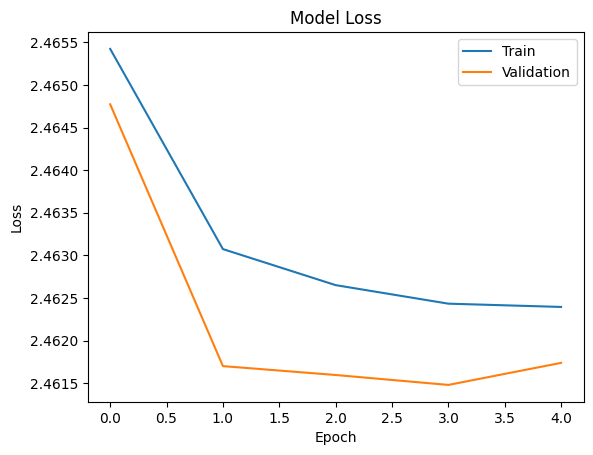

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {accuracy:.2f}')


926/926 ━━━━━━━━━━━━━━━━━━━━ 57s 62ms/step - accuracy: 0.2406 - loss: 2.4628
Validation Accuracy: 0.24
